In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
sent = "My name is Tanmay Ekade. I am in 3rd year at IIT Kharagpur. I am from Nashik, MH. It is India's wine capital!"
tokens = nltk.word_tokenize(sent)
tokens

['My',
 'name',
 'is',
 'Tanmay',
 'Ekade',
 '.',
 'I',
 'am',
 'in',
 '3rd',
 'year',
 'at',
 'IIT',
 'Kharagpur',
 '.',
 'I',
 'am',
 'from',
 'Nashik',
 ',',
 'MH',
 '.',
 'It',
 'is',
 'India',
 "'s",
 'wine',
 'capital',
 '!']

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk import wordpunct_tokenize
wordpunct_tokenize(sent)

['My',
 'name',
 'is',
 'Tanmay',
 'Ekade',
 '.',
 'I',
 'am',
 'in',
 '3rd',
 'year',
 'at',
 'IIT',
 'Kharagpur',
 '.',
 'I',
 'am',
 'from',
 'Nashik',
 ',',
 'MH',
 '.',
 'It',
 'is',
 'India',
 "'",
 's',
 'wine',
 'capital',
 '!']

Difference as you can see is here -->

India + 's (work_tok) ___ vs ___

India + ' + s (workpunct_token)

In [ ]:
from nltk import sent_tokenize
sent_tokenize(sent)

['My name is Tanmay Ekade.',
 'I am in 3rd year at IIT Kharagpur.',
 'I am from Nashik, MH.',
 "It is India's wine capital!"]

In [ ]:
# Stemming is the process of getting the root word for a particular word. Helpful in classification or sentiment analysis etc types of problems
# for ex. working, worked, all basically have the same root word as "work".

wordlist = ["eating", "eaten", "eats", "writing", "write", "program", "programming", "history", "finally", "finalized", "do", "don't", "fairly", "sportingly"]

from nltk.stem import PorterStemmer
stem_port = PorterStemmer()

for word in wordlist:
  print(word + "  ----->  " + stem_port.stem(word))

eating  ----->  eat
eaten  ----->  eaten
eats  ----->  eat
writing  ----->  write
write  ----->  write
program  ----->  program
programming  ----->  program
history  ----->  histori
finally  ----->  final
finalized  ----->  final
do  ----->  do
don't  ----->  don't
fairly  ----->  fairli
sportingly  ----->  sportingli


In [ ]:
#doesnt work for some words like history. problem is solved in lemmatization

from nltk.stem import RegexpStemmer
# removes prefixes or suffxies that we provide to reg_exp
reg_stem = RegexpStemmer('ing$|s$|e$|able$', min=4) # list we provide

reg_stem.stem("eating")

'eat'

In [ ]:
reg_stem.stem("ingeating")

'ingeat'

In [ ]:
reg_stem = RegexpStemmer('ing|s$|e$|able$', min=4) # list we provide # $ basically means at last
reg_stem.stem("ingeating")

'eat'

In [ ]:
# Snowball Stemmer gives better results compared to Porter Stemmer
from nltk.stem import SnowballStemmer
snow_stem = SnowballStemmer('english')
for word in wordlist:
  print(word + " ----> " + snow_stem.stem(word))

eating ----> eat
eaten ----> eaten
eats ----> eat
writing ----> write
write ----> write
program ----> program
programming ----> program
history ----> histori
finally ----> final
finalized ----> final
do ----> do
don't ----> don't
fairly ----> fair
sportingly ----> sport


As you see, last two words in snowball is correct but wrong in Porter one. But for both history is wrong. So relatively better

Lemmatization is technique similar to stemming. It reduces to lemma which is root-word rather than root stem. Best tech. Widely used. (chatbots etc use it)

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemma = WordNetLemmatizer()

for word in wordlist:
  print(word + " ---->> " + lemma.lemmatize(word, pos='n'))

eating ---->> eating
eaten ---->> eaten
eats ---->> eats
writing ---->> writing
write ---->> write
program ---->> program
programming ---->> programming
history ---->> history
finally ---->> finally
finalized ---->> finalized
do ---->> do
don't ---->> don't
fairly ---->> fairly
sportingly ---->> sportingly


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


:param pos: The Part Of Speech tag.

Valid options are "n" for nouns,
    "v" for verbs, "a" for adjectives, "r" for adverbs and "s"
for satellite adjectives.

In [ ]:
for word in wordlist:
  print(word + " ---->> " + lemma.lemmatize(word, pos='v'))

eating ---->> eat
eaten ---->> eat
eats ---->> eat
writing ---->> write
write ---->> write
program ---->> program
programming ---->> program
history ---->> history
finally ---->> finally
finalized ---->> finalize
do ---->> do
don't ---->> don't
fairly ---->> fairly
sportingly ---->> sportingly


takes time for very big sentences or paragraphs

In [ ]:
'''
 ### Stop-words: for different use cases, the para we feed to the model is not completely useful.
      Only some particular words play an important role in framing a response. Stop words are the words which
      are not useful in the para and if removed wont affect the output.
      there is already a list of stop words already present in nltk lib, but it is always advised to make ur own list
 '''

para = """ Above all, My Lord, we want equal political rights, because without them our disabilities will be
permanent. I know this sounds revolutionary to the whites in this country, because the majority of voters will
be Africans. This makes the white man fear democracy.
But this fear cannot be allowed to stand in the way of the only solution which will guarantee racial harmony
and freedom for all. It is not true that the enfranchisement of all will result in racial domination.
Political division, based on colour, is entirely artificial and, when it disappears, so will the domination
of one colour group by another. The ANC has spent half a century fighting against racialism. When it triumphs
as it certainly must, it will not change that policy.
This then is what the ANC is fighting. Our struggle is a truly national one. It is a struggle of the African
people, inspired by our own suffering and our own experience. It is a struggle for the right to live.
During my lifetime I have dedicated my life to this struggle of the African people. I have fought against
white domination, and I have fought against black domination. I have cherished the ideal of a democratic
and free society in which all persons will live together in harmony and with equal opportunities. It is an
ideal for which I hope to live for and to see realised. But, My Lord, if it needs be, it is an ideal for
which I am prepared to die. """

from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

#nltk.download('stopwords')

In [ ]:
print(stopwords.words('english')) # list of enlgish stop words in nltk lib

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
snow_stem = SnowballStemmer('english')

token_sent = sent_tokenize(para)
token_sent

[' Above all, My Lord, we want equal political rights, because without them our disabilities will be \npermanent.',
 'I know this sounds revolutionary to the whites in this country, because the majority of voters will \nbe Africans.',
 'This makes the white man fear democracy.',
 'But this fear cannot be allowed to stand in the way of the only solution which will guarantee racial harmony \nand freedom for all.',
 'It is not true that the enfranchisement of all will result in racial domination.',
 'Political division, based on colour, is entirely artificial and, when it disappears, so will the domination \nof one colour group by another.',
 'The ANC has spent half a century fighting against racialism.',
 'When it triumphs \nas it certainly must, it will not change that policy.',
 'This then is what the ANC is fighting.',
 'Our struggle is a truly national one.',
 'It is a struggle of the African \npeople, inspired by our own suffering and our own experience.',
 'It is a struggle for the

In [ ]:
stp_wrds = stopwords.words('english')
set(stp_wrds)

In [ ]:
# apply stop-words to filter and then do stemming
import nltk

for i in range(len(token_sent)):
  words = nltk.word_tokenize(token_sent[i])

  filtered_words = [snow_stem.stem(word) for word in words if word not in stp_wrds]
  token_sent[i] = ' '.join(filtered_words)

In [ ]:
token_sentw

['abov , my lord , want equal polit right , without disabl perman .',
 'i know sound revolutionari white countri , major voter african .',
 'this make white man fear democraci .',
 'but fear allow stand way solut guarante racial harmoni freedom .',
 'it true enfranchis result racial domin .',
 'polit divis , base colour , entir artifici , disappear , domin one colour group anoth .',
 'the anc spent half centuri fight racial .',
 'when triumph certain must , chang polici .',
 'this anc fight .',
 'our struggl truli nation one .',
 'it struggl african peopl , inspir suffer experi .',
 'it struggl right live .',
 'dure lifetim i dedic life struggl african peopl .',
 'i fought white domin , i fought black domin .',
 'i cherish ideal democrat free societi person live togeth harmoni equal opportun .',
 'it ideal i hope live see realis .',
 'but , my lord , need , ideal i prepar die .']

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

In [ ]:
lemma = WordNetLemmatizer()

for i in range(len(token_sent)):
  words = nltk.word_tokenize(token_sent[i])

  filtered_words = [lemma.lemmatize(word, pos='v') for word in words if word not in stp_wrds]
  token_sent[i] = ' '.join(filtered_words)

token_sent

['Above , My Lord , want equal political right , without disability permanent .',
 'I know sound revolutionary white country , majority voter Africans .',
 'This make white man fear democracy .',
 'But fear allow stand way solution guarantee racial harmony freedom .',
 'It true enfranchisement result racial domination .',
 'Political division , base colour , entirely artificial , disappear , domination one colour group another .',
 'The ANC spend half century fight racialism .',
 'When triumph certainly must , change policy .',
 'This ANC fight .',
 'Our struggle truly national one .',
 'It struggle African people , inspire suffer experience .',
 'It struggle right live .',
 'During lifetime I dedicate life struggle African people .',
 'I fight white domination , I fight black domination .',
 'I cherish ideal democratic free society person live together harmony equal opportunity .',
 'It ideal I hope live see realise .',
 'But , My Lord , need , ideal I prepare die .']

In [ ]:
 ### POS tag i.e. parts of speech tag help to identify all the differnet named entitties in a sentence
# no stemming or stop-word removal is needed since we only need to identify

import nltk
nltk.download('punkt')

sent = nltk.sent_tokenize(para)
sent

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[' Above all, My Lord, we want equal political rights, because without them our disabilities will be \npermanent.',
 'I know this sounds revolutionary to the whites in this country, because the majority of voters will \nbe Africans.',
 'This makes the white man fear democracy.',
 'But this fear cannot be allowed to stand in the way of the only solution which will guarantee racial harmony \nand freedom for all.',
 'It is not true that the enfranchisement of all will result in racial domination.',
 'Political division, based on colour, is entirely artificial and, when it disappears, so will the domination \nof one colour group by another.',
 'The ANC has spent half a century fighting against racialism.',
 'When it triumphs \nas it certainly must, it will not change that policy.',
 'This then is what the ANC is fighting.',
 'Our struggle is a truly national one.',
 'It is a struggle of the African \npeople, inspired by our own suffering and our own experience.',
 'It is a struggle for the

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
for i in range(len(sent)):
  words = nltk.word_tokenize(sent[i])
  pos_tag = nltk.pos_tag(words)
  print(pos_tag)

[('Above', 'IN'), ('all', 'DT'), (',', ','), ('My', 'NNP'), ('Lord', 'NNP'), (',', ','), ('we', 'PRP'), ('want', 'VBP'), ('equal', 'JJ'), ('political', 'JJ'), ('rights', 'NNS'), (',', ','), ('because', 'IN'), ('without', 'IN'), ('them', 'PRP'), ('our', 'PRP$'), ('disabilities', 'NNS'), ('will', 'MD'), ('be', 'VB'), ('permanent', 'JJ'), ('.', '.')]
[('I', 'PRP'), ('know', 'VBP'), ('this', 'DT'), ('sounds', 'VBZ'), ('revolutionary', 'JJ'), ('to', 'TO'), ('the', 'DT'), ('whites', 'NNS'), ('in', 'IN'), ('this', 'DT'), ('country', 'NN'), (',', ','), ('because', 'IN'), ('the', 'DT'), ('majority', 'NN'), ('of', 'IN'), ('voters', 'NNS'), ('will', 'MD'), ('be', 'VB'), ('Africans', 'NNPS'), ('.', '.')]
[('This', 'DT'), ('makes', 'VBZ'), ('the', 'DT'), ('white', 'JJ'), ('man', 'NN'), ('fear', 'NN'), ('democracy', 'NN'), ('.', '.')]
[('But', 'CC'), ('this', 'DT'), ('fear', 'NN'), ('can', 'MD'), ('not', 'RB'), ('be', 'VB'), ('allowed', 'VBN'), ('to', 'TO'), ('stand', 'VB'), ('in', 'IN'), ('the', 'D

In [ ]:
sent = "My name is Tanmay Ekade. I am in 3rd year at IIT Kharagpur. I am from Nashik, MH. It is India's wine capital!"

In [ ]:
print(sent.split())

['My', 'name', 'is', 'Tanmay', 'Ekade.', 'I', 'am', 'in', '3rd', 'year', 'at', 'IIT', 'Kharagpur.', 'I', 'am', 'from', 'Nashik,', 'MH.', 'It', 'is', "India's", 'wine', 'capital!']


In [ ]:
words = sent.split()

In [ ]:
print(nltk.pos_tag(words))

[('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('Tanmay', 'NNP'), ('Ekade.', 'NNP'), ('I', 'PRP'), ('am', 'VBP'), ('in', 'IN'), ('3rd', 'CD'), ('year', 'NN'), ('at', 'IN'), ('IIT', 'NNP'), ('Kharagpur.', 'NNP'), ('I', 'PRP'), ('am', 'VBP'), ('from', 'IN'), ('Nashik,', 'NNP'), ('MH.', 'NNP'), ('It', 'PRP'), ('is', 'VBZ'), ("India's", 'NNP'), ('wine', 'NN'), ('capital!', 'NN')]


In [ ]:
### Named entity recognition --> In a sentence different parts are highlighted based on it type
# name: tanmay || place or location: nashik || date: 29/11/2003 || time: 3.24pm || money, percent, etc.

sent = "Hello! Tanmay here. I am a 3rd year undergraudate at IIT Kharagpur. I am from Nashik, Maharashtra"

import nltk
words = nltk.word_tokenize(sent)

In [ ]:
pos_elemnts = nltk.pos_tag(words)

In [ ]:
nltk.download('maxent_ne_chunker')

In [ ]:
nltk.download('words')

In [ ]:
# to do named entity just run one line
tree = nltk.ne_chunk(pos_elemnts)

In [ ]:
!pip install svgling

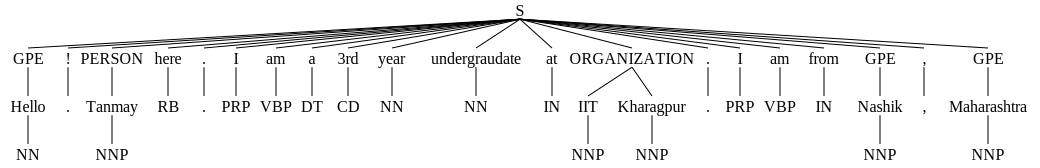

In [ ]:
from IPython.display import display
display(tree)

All the above methods described are the "Text Pre-processing" ones. Now we proceed to convert this text to vectors and then finally feed them to our model.


General Methods for Text --> Vector:
1.   One hot encoding (dont use generally): sklearn= onehotencoder and pandas= pd.get_dummies
2.   bag of words (bow) used frequently
3.   TF-IDF (term freq - inverse document freq.)
4.    Word2Vec
5.   AvgWord2Vec

In [ ]:
### bag of words BOW
'''
 suppose we have some trai ning data as few sentences:
 1) He is a good boy || 2) She is a good girl || 3) Boy and girl are good || etc.

we first proceed by lowering all sentences (str.lower()) and then applying stop-words to get only necessary ones
then on the remaining words we define a vocabulary which is basically the set of all unique words. remaining ex:
1) good boy || 2) good girl || 3) boy girl good. (notice everything is lowercase)

now we proceed to create a vocabulary, frequency = {[good, 3], [boy, 2], [girl, 2]}
arrange this vocab, freq in descending order and now convert each of the sentences to vectors like:
   good, boy, girl.  # 2 types of BOW based on freq: binary and normal. if in sent a specific word occurs more than 1 time then in binary count wont matter always 1. but in normal BOW we set it equal to count. (ex: good 2)
1) [1, 1, 0]
2) [1, 0, 1]
3) [1, 1, 1]

we get the required vectors for each of the sentences
'''

# disadvantages
'''
1. sparse matrix/array (causes overfitting) 2. ordering of words changed 3. words out of vocabulary not considered 3. semantic meaning is not captured

for 3. --> consider two sent: 1) The food is good and 2) The food is not good
there are opposites of each other i.e. not similar in any way. If using BOW we try to get vectors they are as follows
1) [1, 1, 1, 0, 1]   0 is for not
2) [1, 1, 1, 1, 1]

so if we find the cosine dist/similarity we wont find a large difference since only 1 number is changing but
in reality the sent are opp to each other. hence disadvantage
'''

In [ ]:
### TF-IDF
'''
Sentences: 1) good boy || 2) good girl || 3) boy girl good

Term freq(TF) = no of times word repeating in sent / no of words in sent

IDF(inverse document freq.) = ln(no of sent / no of sent containing the word)

vocab: [good boy girl]  TF for each word in sent is-->
s1: 1/2, 1/2, 0
s2: 1/2, 0, 1/2
s3: 1/3, 1/3, 1/3

IDF for each word -->
good: ln(3/3)=0
boy: ln(3/2)
girl: ln(3/2)

Final vector for each sent is TF*IDF element-wise or word-wise:
Ex- TF s1=[1/2(good), 1/2(boy), 0(girl)] * IDF [0, ln(3/2), ln(3/2)]
hence final vector using above is -->

s1 = [0, 1/2*ln(3/2), 0]
s2 = [0, 0, 1/2*ln(3/2)]
s3 = [0, 1/2*ln(3/2), 1/2*ln(3/2)]
'''

### adv and disadvantages
'''
as we can see the word importance is getting captured effectively. most common is least imp (good here)

disadv is sparsity still exists and other one that words out of vocab still not counted
'''

In [ ]:
### word2vec --> deep learning pre-trained model
'''
a deep learning model is already trained on a very large vocabulary of words (billions of words)
when we pass our unique vocab to this model, then it assigns weights to each of our words based on its association
with the already pre-trained ones.

word2vec it of two types: 1) CBOW (continuous bag of words)  2) Skipgram


'''